# Traditional Methods
- re-hashing the analysis that I did around fall 2020

In [1]:
import xarray as xr
from NI_tools.NI_tools import inversion, utils
from dask.distributed import Client
import hvplot.xarray
from scipy import signal
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy

#plt.rcParams['font.family'] = ['serif']
#plt.rcParams['font.serif'] = ['CMU Serif']
#plt.rcParams.update({'font.size': 18})
#plt.rc('axes', unicode_minus=False)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
client = Client()
client

<Client: 'tcp://127.0.0.1:34101' processes=8 threads=32, memory=62.80 GiB>

### write to netCDF to zarr

In [3]:
fn = '/datadrive/NCCFs/old/6year_NCCF_201_hilbert.nc'
NCCFs_201 = xr.open_dataarray(fn)
#NCCFs_201 = NCCFs_201.chunk({'delay':11999, 'dates':20})

fn = '/datadrive/NCCFs/old/6year_NCCF_601_hilbert.nc'
NCCFs_601 = xr.open_dataarray(fn)
#NCCFs_601 = NCCFs_601.chunk({'delay':11999, 'dates':20})

fn = '/datadrive/NCCFs/old/6year_NCCF_1001_hilbert.nc'
NCCFs_1001 = xr.open_dataarray(fn)
#NCCFs_1001 = NCCFs_1001.chunk({'delay':11999, 'dates':20})

In [4]:
NCCFs = xr.Dataset({'201':NCCFs_201, '601':NCCFs_601, '1001':NCCFs_1001})

In [5]:
NCCFs = NCCFs.chunk({'delay':119999, 'dates':20})

In [6]:
# write to zarr
NCCFs.to_zarr('/datadrive/NCCFs/old/6year_NCCF_hilbert.zarr')

## Compute Dense Arrival Times for 3 averaging times

### Broadband

In [7]:
ds = xr.open_zarr('/datadrive/NCCFs/old/6year_NCCF_hilbert.zarr/')

In [8]:
for item in ds.keys():
    print(item)

1001
201
601


In [9]:
arrival_times = inversion.calc_prop_times(ds, peaks=['dA', 's1b0A', 's1b0B', 's2b1A', 's2b1B'])

In [11]:
arrival_times.to_netcdf('/datadrive/NCCFs/old/arrival_times.nc')

### 40 Hz Cutoff

### 30 Hz Cutoff

In [3]:
ds = xr.open_zarr('/datadrive/NCCFs/old/6year_NCCF_hilbert.zarr/')

In [4]:
b,a = signal.butter(4, Wn=0.3, btype='lowpass')
ds_filt = utils.xr_filtfilt(ds, dim='delay', b=b, a=a)

In [5]:
arrival_times = inversion.calc_prop_times(ds_filt, peaks=['dA', 's1b0A', 's1b0B', 's2b1A', 's2b1B'])

In [6]:
arrival_times.to_netcdf('/datadrive/NCCFs/old/arrival_times_1_30Hz.nc')

In [4]:
ds = xr.open_zarr('/datadrive/NCCFs/old/6year_NCCF_hilbert.zarr/')

In [10]:
b,a = signal.butter(4, Wn=0.4, btype='lowpass')
ds_filt = utils.xr_filtfilt(ds, dim='delay', b=b, a=a)

In [12]:
arrival_times = inversion.calc_prop_times(ds_filt, peaks=['dA', 's1b0A', 's1b0B', 's2b1A', 's2b1B'])

In [15]:
arrival_times.to_netcdf('/datadrive/NCCFs/old/arrival_times_1_40Hz.nc')

### 1-5 Hz

In [3]:
ds = xr.open_zarr('/datadrive/NCCFs/old/6year_NCCF_hilbert.zarr/')

Text(0, 0.5, 'dB')

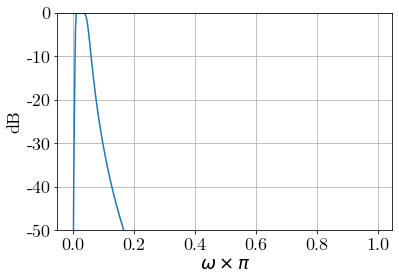

In [4]:
b,a = signal.butter(4, Wn=[0.01,0.05], btype='bandpass')
f,w = signal.freqz(b,a)
plt.plot(f/np.pi, 20*np.log10(np.abs(w)))
plt.grid()
plt.ylim([-50,0])
plt.xlabel('$\omega \\times \pi$')
plt.ylabel('dB')

In [5]:
ds_filt = utils.xr_filtfilt(ds, dim='delay', b=b, a=a)

In [32]:
ds_filtered_slice = ds_filt['1001'].isel({'dates':slice(0,52407,100)}).compute()

In [37]:
ds_filtered_slice.hvplot.image(x='dates', y='delay', rasterize=True)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


:DynamicMap   []
   :Image   [dates,delay]   (1001)

In [6]:
arrival_times = inversion.calc_prop_times(ds_filt, peaks=['dA', 's1b0A', 's1b0B', 's2b1A', 's2b1B'])

In [7]:
arrival_times.to_netcdf('/datadrive/NCCFs/old/arrival_times_1_5Hz.nc')

### 5-10 Hz

In [3]:
ds = xr.open_zarr('/datadrive/NCCFs/old/6year_NCCF_hilbert.zarr/')

Text(0, 0.5, 'dB')

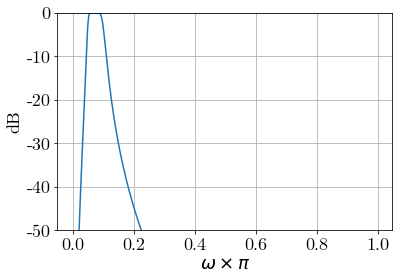

In [4]:
b,a = signal.butter(4, Wn=[0.05,0.1], btype='bandpass')
f,w = signal.freqz(b,a)
plt.plot(f/np.pi, 20*np.log10(np.abs(w)))
plt.grid()
plt.ylim([-50,0])
plt.xlabel('$\omega \\times \pi$')
plt.ylabel('dB')

In [5]:
ds_filt = utils.xr_filtfilt(ds, dim='delay', b=b, a=a)

In [6]:
arrival_times = inversion.calc_prop_times(ds_filt, peaks=['dA', 's1b0A', 's1b0B', 's2b1A', 's2b1B'])

In [ ]:
arrival_times.to_netcdf('/datadrive/NCCFs/old/arrival_times_5_10Hz.nc')

## Explore 5 Hz band arrival times

In [114]:
fn = '/datadrive/NCCFs/old/arrival_times/arrival_times_1_5Hz.nc'
at_1_5= xr.open_dataset(fn)

fn = '/datadrive/NCCFs/old/arrival_times/arrival_times_5_10Hz.nc'
at_5_10= xr.open_dataset(fn)

fn = '/datadrive/NCCFs/old/arrival_times/arrival_times_10_15Hz.nc'
at_10_15= xr.open_dataset(fn)

fn = '/datadrive/NCCFs/old/arrival_times/arrival_times_15_20Hz.nc'
at_15_20= xr.open_dataset(fn)

fn = '/datadrive/NCCFs/old/arrival_times/arrival_times_20_25Hz.nc'
at_20_25= xr.open_dataset(fn)

fn = '/datadrive/NCCFs/old/arrival_times/arrival_times_25_30Hz.nc'
at_25_30 = xr.open_dataset(fn)

fn = '/datadrive/NCCFs/old/arrival_times/arrival_times_bb.nc'
at_1_90 = xr.open_dataset(fn)

In [115]:

plot_5_10 = at_5_10.loc[{'peak':'s1b0A'}]['201'].hvplot(width=1000, grid=True, label='5 - 10 Hz')
plot_10_15 = at_10_15.loc[{'peak':'s1b0A'}]['201'].hvplot(width=1000, grid=True, label= '10 - 15 Hz')
plot_15_20 = at_15_20.loc[{'peak':'s1b0A'}]['201'].hvplot(width=1000, grid=True, label= '15 - 20 Hz')
plot_20_25 = at_20_25.loc[{'peak':'s1b0A'}]['201'].hvplot(width=1000, grid=True, label= '20 - 25 Hz')
plot_25_30 = at_25_30.loc[{'peak':'s1b0A'}]['201'].hvplot(width=1000, grid=True, label= '25 - 30 Hz')



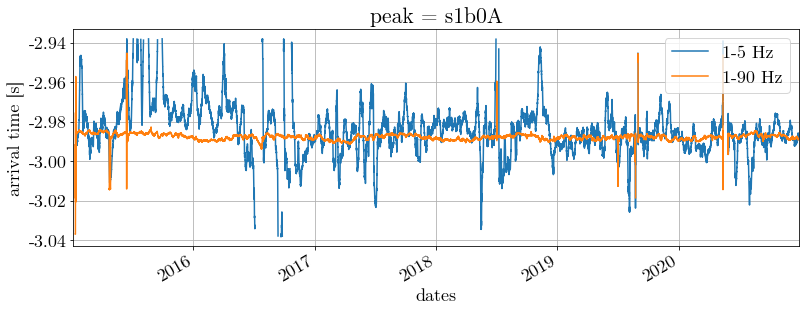

In [126]:
fig = plt.figure(figsize=(13,4))
at_1_5.loc[{'peak':'s1b0A'}]['201'].plot(label='1-5 Hz')
at_1_90.loc[{'peak':'s1b0A'}]['201'].plot(label='1-90 Hz')

plt.xlim([at_1_5.dates[0], at_1_5.dates[-1]])
plt.grid()
plt.ylabel('arrival time [s]')
plt.legend()
fig.savefig('figures/1_5_arrival_time.png', dpi=300)

## Explore Arrival Times

#### Open Surface Temp

In [2]:
fn = '/datadrive/sst_data/*.nc'
ds = xr.open_mfdataset(fn)

lat_midpoint = 45.94718
lon_midpoint = 360-129.9913

lat_idx = np.argmin(np.abs(ds.lat.values - lat_midpoint))
lon_idx = np.argmin(np.abs(ds.lon.values - lon_midpoint))

surf_temp = ds.isel({'lat':lat_idx, 'lon':lon_idx}).sst.loc[pd.Timestamp('2015-01-01'):pd.Timestamp('2021-01-01'):3]

In [66]:
temp_plot = surf_temp.hvplot(grid=True, height=200)

#### Plot arrival times

In [ ]:
at_1_40 = xr.open_dataset('/datadrive/NCCFs/old/arrival_times/arrival_times_1_40Hz.nc')
at_1_30 = xr.open_dataset('/datadrive/NCCFs/old/arrival_times/arrival_times_1_30Hz.nc')
at_1_90 = xr.open_dataset('/datadrive/NCCFs/old/arrival_times/arrival_times_bb.nc')

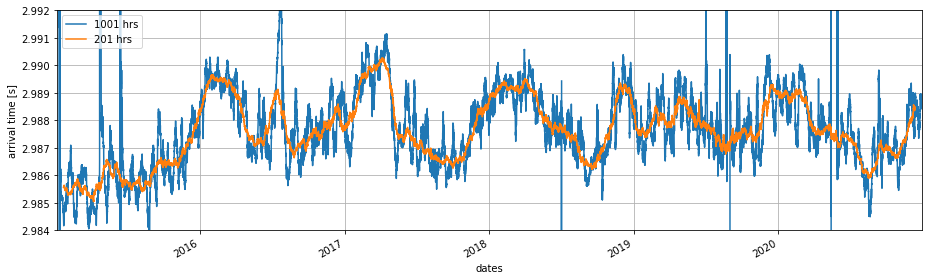

In [65]:
fig = plt.figure(figsize=(13,4))
(-1*at_1_90).loc[{'peak':'s1b0A'}]['201'].plot(label='1001 hrs')
(-1*at_1_90).loc[{'peak':'s1b0A'}]['1001'].plot(label='201 hrs')
plt.xlim([at_1_90.dates[0], at_1_90.dates[-1]])
plt.ylim([2.984, 2.992])
plt.title('')
plt.grid()
plt.ylabel('arrival time [s]')
plt.legend(loc='upper left')

plt.tight_layout()
fig.savefig('figures/201_1001.png', dpi=300)

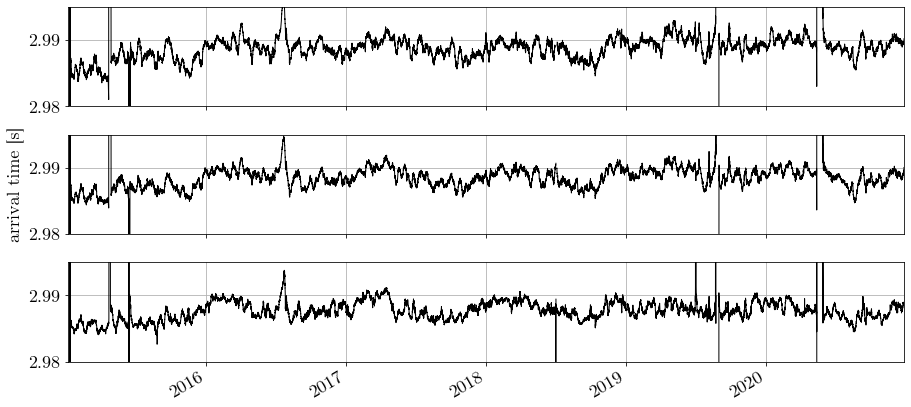

In [75]:
fig, axes = plt.subplots(3,1,figsize=(13,6))
axes = np.ndarray.flatten(axes)

ax = axes[0]
plt.sca(ax)
(-1*at_1_30['201'].loc['s1b0A']).plot(ax=ax, label='1-30 Hz', linewidth=1, c='k')
plt.grid()
plt.ylabel('arrival time [s]')
plt.xlabel('')
#plt.title('surface reflection arrival time 1-30 Hz')
plt.title('')
plt.ylim([2.98, 2.995])
plt.ylabel('')
ax.set_xticklabels('')
plt.xlim([at_1_30.dates[0], at_1_30.dates[-1]])

ax = axes[1]
plt.sca(ax)
(-1*at_1_40['201'].loc['s1b0A']).plot(ax=ax, label='1-40 Hz', linewidth=1, c='k')
plt.grid()
plt.ylabel('arrival time [s]')
plt.xlabel('')
#plt.title('surface reflection arrival time 1-40 Hz')
plt.title('')
plt.ylim([2.98, 2.995])
ax.set_xticklabels('')
plt.xlim([at_1_30.dates[0], at_1_30.dates[-1]])

ax = axes[2]
plt.sca(ax)
(-1*at_1_90['201'].loc['s1b0A']).plot(ax=ax, label='1-90 Hz', linewidth=1, c='k')
plt.grid()
plt.ylabel('arrival time [s]')
plt.xlabel('')
#plt.title('surface reflection arrival time 1-90 Hz')
plt.title('')
plt.ylim([2.98, 2.995])
plt.ylabel('')
plt.xlim([at_1_30.dates[0], at_1_30.dates[-1]])

plt.tight_layout()
fig.savefig('figures/s1b0A.png', dpi=300)

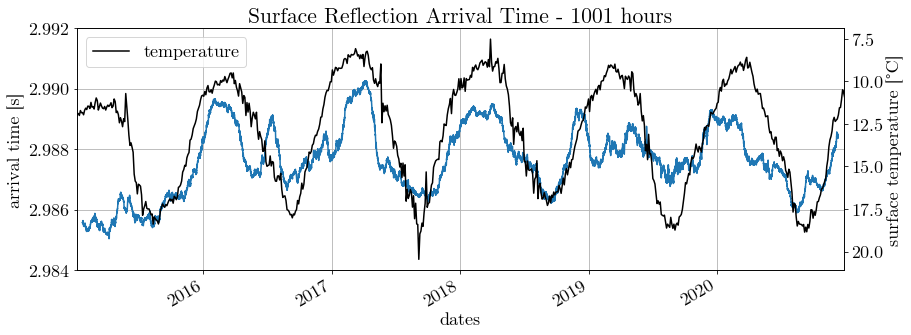

In [22]:
fig = plt.figure(figsize=(13,5))
ax1 = plt.gca()

ax2 = plt.twinx(ax1)

plt.sca(ax2)
surf_temp.plot(c='k', label='temperature')
ax2.invert_yaxis()
plt.title('')
plt.legend()
plt.ylabel('surface temperature [°C]')


plt.sca(ax1)
#(-1*at_1_90)['201'].loc['s1b0A'].plot()
#(-1*at_1_90)['601'].loc['s1b0A'].plot()
(-1*at_1_90)['1001'].loc['s1b0A'].plot(label='arrival time [s]')

plt.ylabel('arrival time [s]')
plt.title('Surface Reflection Arrival Time - 1001 hours')
plt.xlim([at_1_90.dates[0], at_1_90.dates[-1]])
plt.ylim([2.984, 2.992])
plt.grid()
plt.tight_layout()

fig.savefig('figures/1001_arrival_time_temp.png', dpi=300)

In [5]:
fn = '/datadrive/NCCFs/old/arrival_times/arrival_times_1_40Hz.nc'
arrival_times_40 = xr.open_dataset(fn)

In [7]:
s1b0A_40 = arrival_times_40.loc[{'peak':'s1b0A'}].isel({'dates':slice(0,-1,50)})*-1
s1b0B_40 = arrival_times_40.loc[{'peak':'s1b0B'}].isel({'dates':slice(0,-1,50)})

#s1b0A_bb = arrival_times.loc[{'peak':'s1b0A'}].isel({'dates':slice(0,-1,50)})*-1
#s1b0B_bb = arrival_times.loc[{'peak':'s1b0B'}].isel({'dates':slice(0,-1,50)})

In [70]:
avg_hr = '201'
arr_plot_201 = (s1b0A_40[avg_hr].hvplot(label='40 Hz',grid=True, title=f'{avg_hr} hours averaging', ylabel='arrival time [s]', ylim=(2.985, 2.991)) * s1b0A_bb[avg_hr].hvplot(label='broad band'))

In [68]:
avg_hr = '601'
arr_plot_601 = (s1b0A_40[avg_hr].hvplot(label='40 Hz',grid=True, title=f'{avg_hr} hours averaging', ylabel='arrival time [s]', ylim=(2.985, 2.991)) * s1b0A_bb[avg_hr].hvplot(label='broad band'))

In [69]:
avg_hr = '1001'
arr_plot_1001 = (s1b0A_40[avg_hr].hvplot(label='40 Hz',grid=True, title=f'{avg_hr} hours averaging', ylabel='arrival time [s]', ylim=(2.985, 2.991)) * s1b0A_bb[avg_hr].hvplot(label='broad band'))

In [71]:
(arr_plot_201 + temp_plot).cols(1)

:Layout
   .Overlay.I :Overlay
      .Curve.A_40_Hz    :Curve   [dates]   (201)
      .Curve.Broad_band :Curve   [dates]   (201)
   .Curve.I   :Curve   [time]   (sst)

In [72]:
(arr_plot_601 + temp_plot).cols(1)

:Layout
   .Overlay.I :Overlay
      .Curve.A_40_Hz    :Curve   [dates]   (601)
      .Curve.Broad_band :Curve   [dates]   (601)
   .Curve.I   :Curve   [time]   (sst)

In [75]:
arr_plot_1001 * temp_plot

:Overlay
   .Curve.A_40_Hz    :Curve   [dates]   (1001)
   .Curve.Broad_band :Curve   [dates]   (1001)
   .Curve.I          :Curve   [time]   (sst)

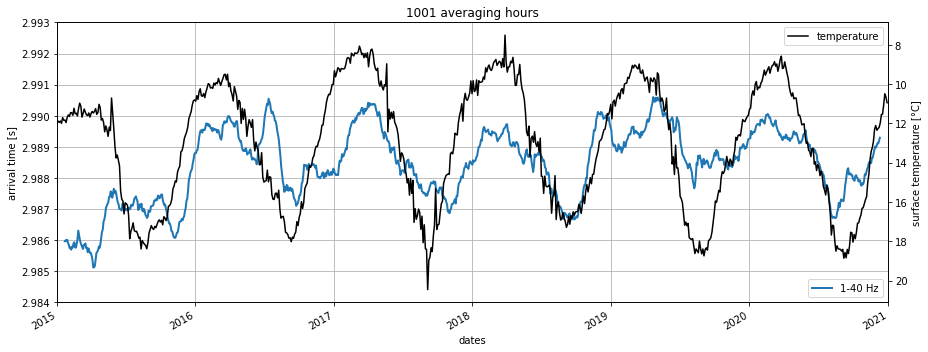

In [12]:
avg_hr = '1001'

fig, ax1 = plt.subplots(figsize=(13,5))
ax2 = ax1.twinx()

plt.sca(ax2)
surf_temp.plot(c='k', label='temperature')
ax2.invert_yaxis()
plt.title('')
plt.legend()
plt.ylabel('surface temperature [°C]')

plt.sca(ax1)
s1b0A_40[avg_hr].plot(linewidth=2, label='1-40 Hz')
#s1b0A_bb[avg_hr].plot(linewidth=2, label='1-90 Hz')
plt.ylim([2.984, 2.993])
plt.grid()
plt.legend(loc='lower right', facecolor='white',)
plt.title(avg_hr + ' averaging hours')
plt.xlim([pd.Timestamp('2015-01-01'), pd.Timestamp('2021-01-01')])
plt.ylabel('arrival time [s]')


plt.tight_layout()

#fig.savefig(f'figures/{avg_hr}_arrival_time.png', dpi=300)

## Explore filtered NCCFs

In [47]:
ds = xr.open_dataset('/datadrive/NCCFs/old/6year_NCCF_201.nc')

In [36]:
da_c = xr.DataArray(np.abs(signal.hilbert(ds['201 average hour nccf'])), dims=ds.dims, coords=ds.coords, name='envelope 25-30 Hz')

In [38]:
da_c.hvplot(x='dates', y='delay', rasterize=True)

:DynamicMap   []
   :Image   [dates,delay]   (envelope 25-30 Hz)

In [32]:
ds['201 average hour nccf'][::50, :].hvplot(x='dates', y='delay', rasterize=True)

:DynamicMap   []
   :Image   [dates,delay]   (201 average hour nccf)

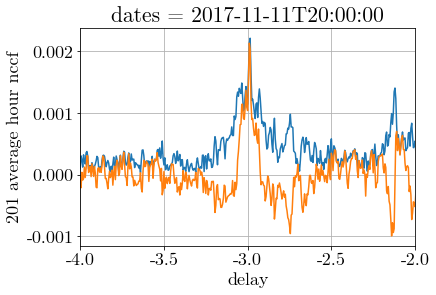

In [48]:
plt.plot(ds.delay, np.abs(signal.hilbert(ds['201 average hour nccf'][25000, :].values)))
plt.xlim([-4,-2])
plt.grid()

ds['201 average hour nccf'][25000, :].plot()

## Explore 201 / 1001 difference

In [3]:
at = xr.open_dataset('/datadrive/NCCFs/old/arrival_times/arrival_times_bb.nc')

In [4]:
nonan_201 = at['201'].loc['s1b0A']
nonan_201[np.isnan(at['201'].loc['s1b0A'])] = 0

nonan_1001 = at['1001'].loc['s1b0A']
nonan_1001[np.isnan(at['1001'].loc['s1b0A'])] = 0

In [5]:
nonan_1001.values

array([0., 0., 0., ..., 0., 0., 0.])

In [6]:
diff = (at['201'] - at['1001']).loc['s1b0A',:]
diff.name = 'difference'
diff[np.isnan(diff)]=0

In [7]:
f, PSD_diff = signal.welch(diff.values, fs = 1, nperseg=2**12, noverlap=2**11, nfft=2**15)
_, PSD_201 = signal.welch(nonan_201.values, fs = 1, nperseg=2**12, noverlap=2**11, nfft=2**15)
_, PSD_1001 = signal.welch(nonan_1001.values, fs=1, nperseg=2*12, noverlap=2*11, nfft=2**15)

T = 1/f

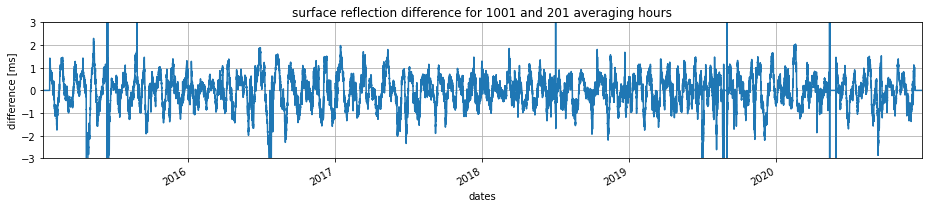

In [46]:
fig = plt.figure(figsize=(13,3))
(1000*diff).plot()
plt.xlim([diff.dates[0], diff.dates[-1]])
plt.ylim([-3, 3])
plt.ylabel('difference [ms]')
plt.grid()
plt.title('surface reflection difference for 1001 and 201 averaging hours')

plt.tight_layout()
fig.savefig('figures/difference.png', dpi=300)

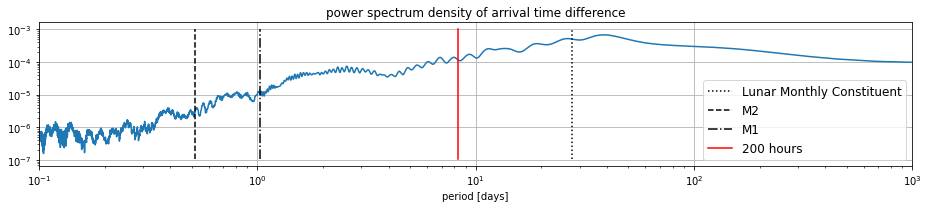

In [45]:
fig, axes = plt.subplots(1,1,figsize=(13,3))

plt.sca(axes)
ax = plt.gca()
plt.plot(T/24, PSD_diff)
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel('period [days]')
plt.grid()
ylims=ax.get_ylim()

plt.plot(np.array([661.309, 661.309])/24, ylims, 'k:', label='Lunar Monthly Constituent')
plt.plot(np.array([12.421,12.421])/24, ylims, 'k--', label='M2')
plt.plot(np.array([24.833,24.833])/24, ylims, 'k-.', label='M1')
plt.plot(np.array([200, 200])/24, ylims, 'r', label='200 hours')
plt.legend(fontsize=12)

plt.xlim([1e-1, 1e3])

plt.title('power spectrum density of arrival time difference') 

plt.tight_layout()
fig.savefig('figures/difference_PSD.png', dpi=300)

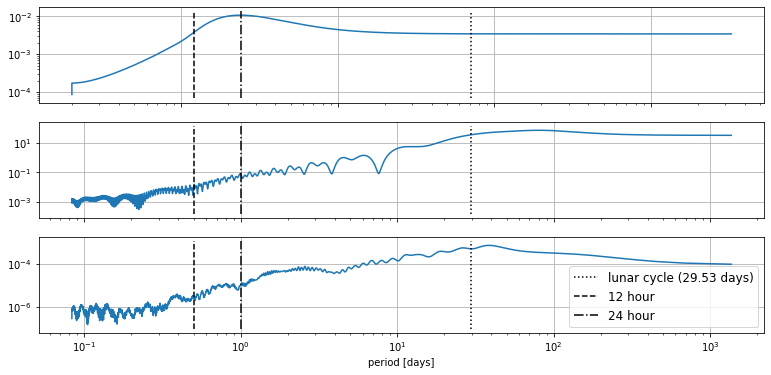

In [9]:
fig, axes = plt.subplots(3,1,figsize=(13,6))
axes = np.ndarray.flatten(axes)

plt.sca(axes[0])
ax = plt.gca()
plt.plot(T, PSD_1001)
ax.set_xscale('log')
ax.set_yscale('log')
plt.grid()
ylims=ax.get_ylim()
plt.plot(np.array([708.72, 708.72]), ylims, 'k:', label='lunar cycle (29.53 days)')
plt.plot(np.array([12,12]), ylims, 'k--', label='12 hour')
plt.plot(np.array([24,24]), ylims, 'k-.', label='24 hour')
ax.set_xticklabels('')

plt.sca(axes[1])
ax = plt.gca()
plt.plot(T/24, PSD_201)
ax.set_xscale('log')
ax.set_yscale('log')
plt.grid()
ylims=ax.get_ylim()
plt.plot(np.array([708.72, 708.72])/24, ylims, 'k:', label='lunar cycle (29.53 days)')
plt.plot(np.array([12,12])/24, ylims, 'k--', label='12 hour')
plt.plot(np.array([24,24])/24, ylims, 'k-.', label='24 hour')
ax.set_xticklabels('')

plt.sca(axes[2])
ax = plt.gca()
plt.plot(T/24, PSD_diff)
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel('period [days]')
plt.grid()
ylims=ax.get_ylim()
plt.plot(np.array([708.72, 708.72])/24, ylims, 'k:', label='lunar cycle (29.53 days)')
plt.plot(np.array([12,12])/24, ylims, 'k--', label='12 hour')
plt.plot(np.array([24,24])/24, ylims, 'k-.', label='24 hour')
plt.legend(fontsize=12)